## Day 82 Lecture 1 Assignment

In this assignment, we will learn about convolutions using Dask arrays.

In [25]:
!pip install dask[complete] -U --quiet

In [26]:
import dask.array as da

In [27]:
import os
import random

import cv2
import numpy as np
import pandas as pd

from google.colab.patches import cv2_imshow

In [36]:
image = cv2.imread('/content/6-facial-recognition-hero.jpg', 0)

(1360, 2040)


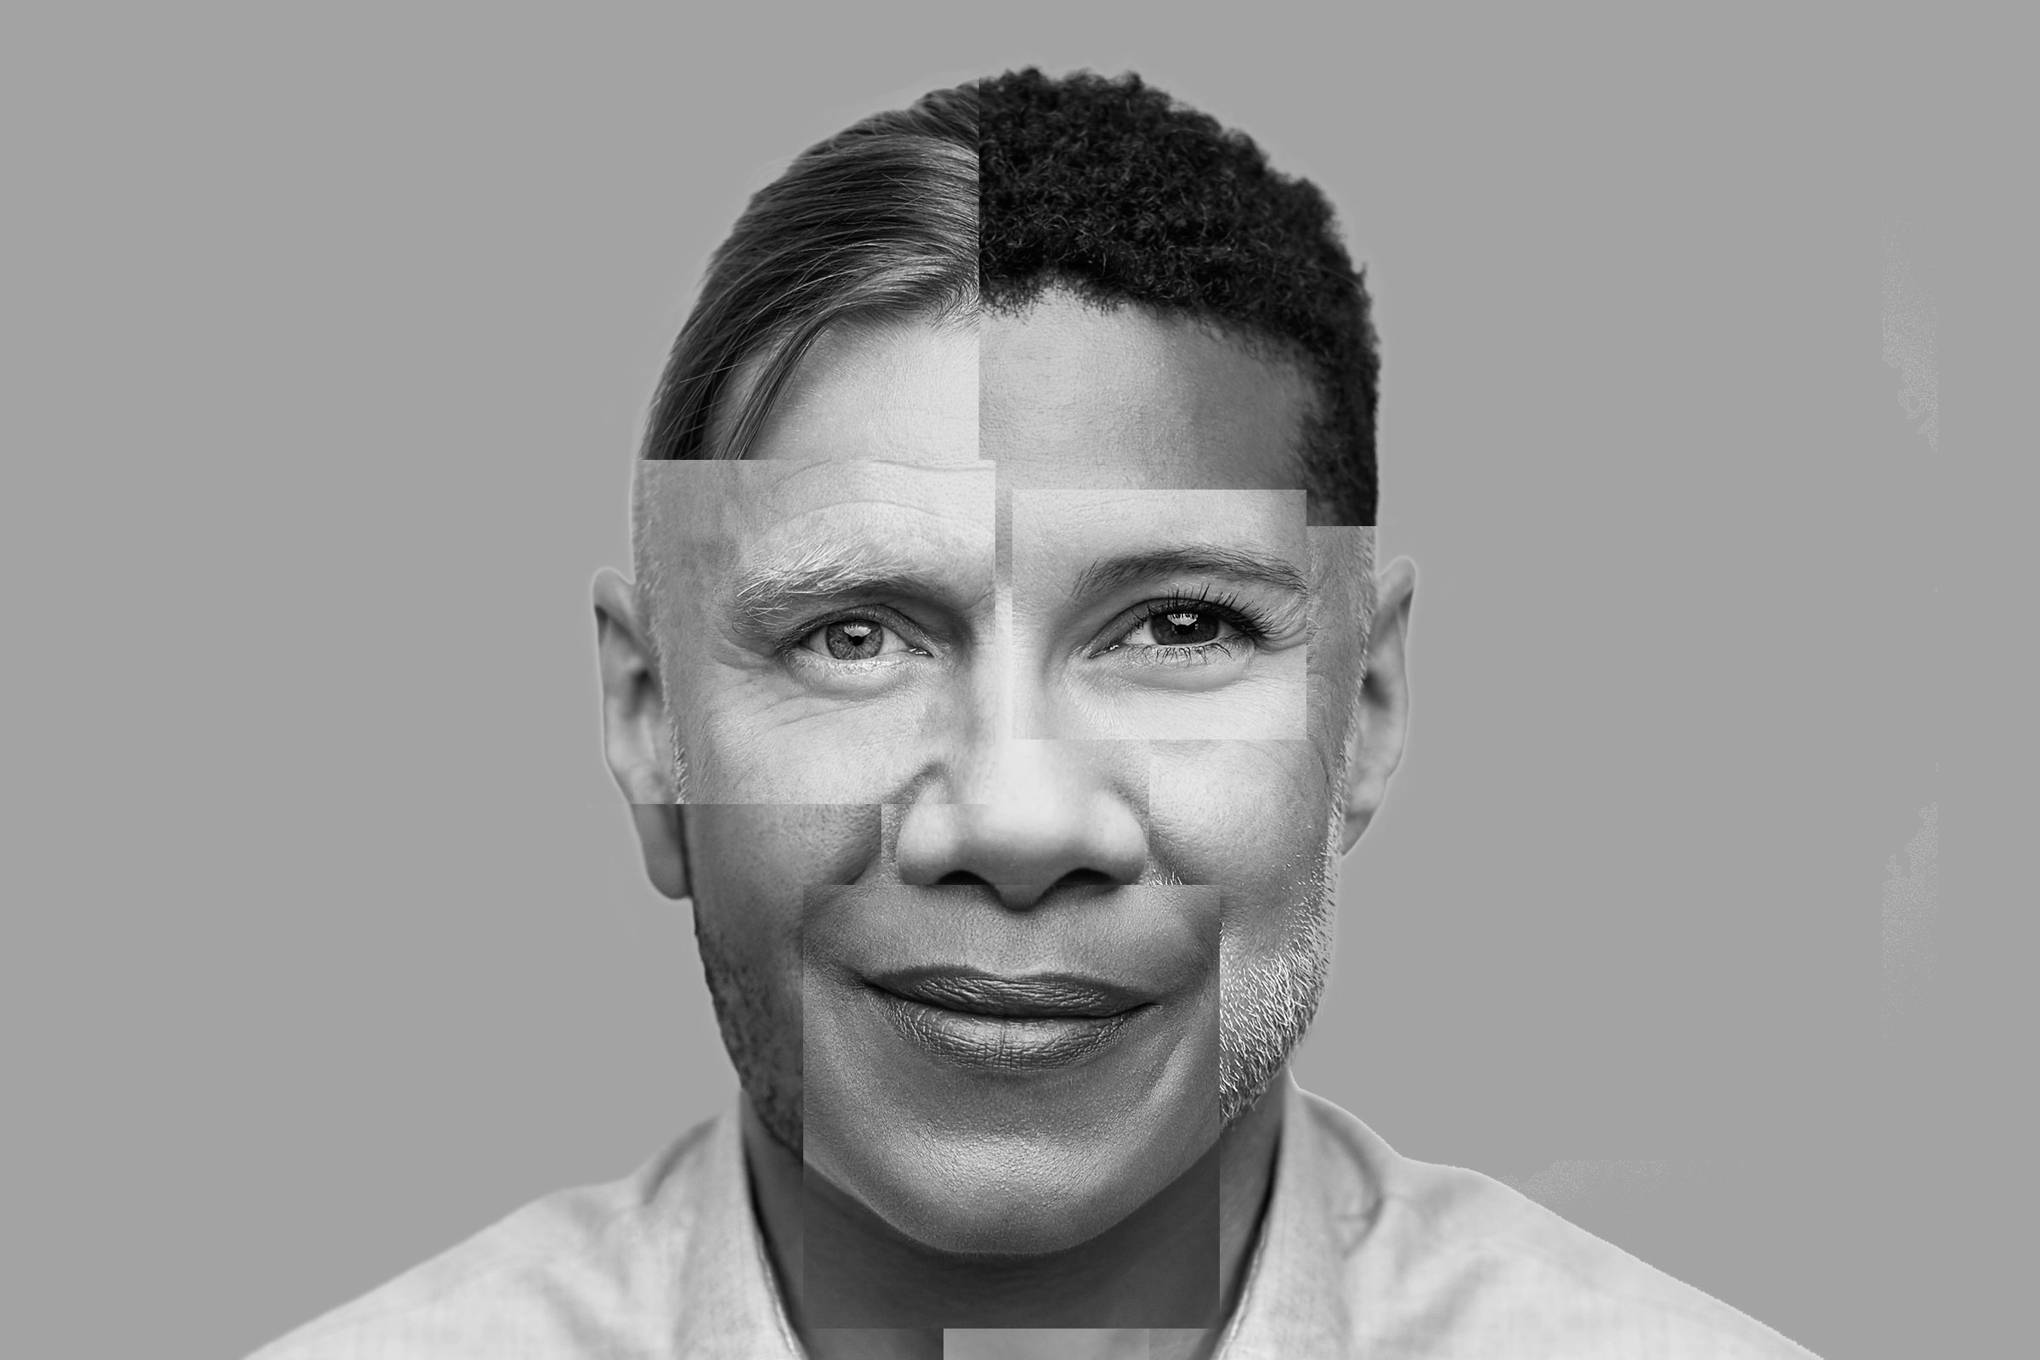

In [35]:
print(image.shape)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
image_da = da.asarray(image)

Rechunk the image array into chunks of 100x100.

In [38]:
image_da.shape

(1360, 2040)

In [40]:
image_da

dask.array<array, shape=(1360, 2040), dtype=uint8, chunksize=(1360, 2040), chunktype=numpy.ndarray>

In [41]:
%%time
rechunked = da.rechunk(image_da, chunks=(100, 100))
rechunked

CPU times: user 5.24 ms, sys: 0 ns, total: 5.24 ms
Wall time: 6.43 ms


In [42]:
rechunked

dask.array<rechunk-merge, shape=(1360, 2040), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In the code above, we read an image of a face and converted it into a Dask array. We will use this array to learn about convolutions. You can learn more about convolutions <a href="http://setosa.io/ev/image-kernels/">here</a>.

Convolutions are transformations of matrices that help us create convolutional neural network (which are crucial in deep learning) or apply effects to images like blurring or sharpening.

Our kernel is a 3x3 matrix which we apply to every 3x3 subset of our image matrix.

To start with our transformation, zero pad the image matrix with a width of one. This means that our output will be a matrix with an additional row and additional column of zeros on both sides. The image below illustrates padding. Use the pad function 
<img src="https://www.researchgate.net/profile/Terje_Midtbo/publication/318967374/figure/fig4/AS:669210783002634@1536563692382/Visualization-of-a-matrix-that-is-zero-padded-with-one-border.png">

In [44]:
padded = da.pad(rechunked, 1, 'constant')

What is the shape of our padded array?

In [46]:
print(f"The shape of the padded array is {padded.shape}")

The shape of the padded array is (1362, 2042)


To apply a convolution, we will install the `dask-image` package. Do this below.

In [47]:
!pip install dask-image -U --quiet

     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 


Import the convolve function from the package

In [48]:
from dask_image.ndfilters import convolve

Define the sharpen convolution from the setosa.io article mentioned above. Apply the convolution to our padded image.

In [50]:
sharpen = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

convolve(padded, sharpen)

dask.array<_trim, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>